In [1]:
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=54b88b17d0961df38eaafa17da218ec5dacf47e1123aa2d8f9528a585f6b1e5a
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Step 1: Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard gate to qubit 0 (makes it superposition)
qc.h(0)

# Step 3: Apply CNOT gate (entangles qubit 0 and qubit 1)
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Step 5: Run the circuit on simulator (modern way)
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()
counts = result.get_counts(qc)

# Step 6: Show the result as a histogram
print(counts)
plot_histogram(counts)
plt.show()

{'00': 493, '11': 531}


In [4]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

hist = plot_histogram(counts)  # store the figure
plt.show()                     # force render in Colab

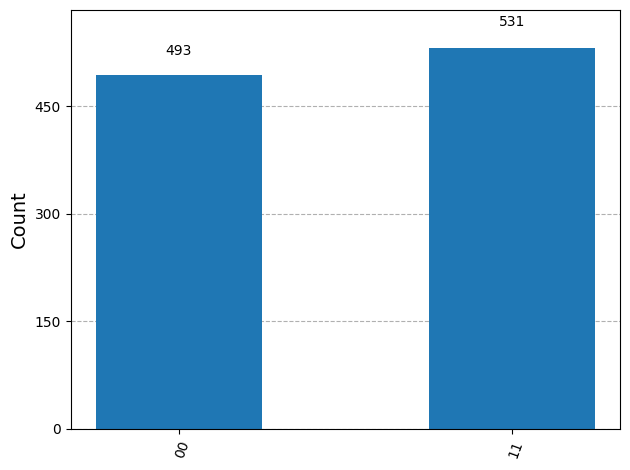

In [5]:
plot_histogram(counts)

In [6]:
qc.draw("text")

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1